In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 112.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO
import torch
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
print("Train images:", len(os.listdir('/content/datasets/brain-tumor/train')))
print("Valid images:", len(os.listdir('/content/datasets/brain-tumor/valid')))
with open('datasets/brain-tumor.yaml', 'r', encoding='utf-8') as f:
    print(f.read())

Train images: 4
Valid images: 3
# Ultralytics YOLO 🚀, AGPL-3.0 license
# Brain-tumor dataset by Ultralytics
# Documentation: https://docs.ultralytics.com/datasets/detect/brain-tumor/
# Example usage: yolo train data=brain-tumor.yaml
# parent
# ├── ultralytics
# └── datasets
#     └── brain-tumor  ← downloads here (4.05 MB)

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/brain-tumor # dataset root dir
train: train/images # train images (relative to 'path') 893 images
val: valid/images # val images (relative to 'path') 223 images
test: # test images (relative to 'path')

# Classes
names:
  0: negative
  1: positive

# Download script/URL (optional)
download: https://github.com/ultralytics/assets/releases/download/v0.0.0/brain-tumor.zip


In [ ]:
# Cargar un modelo YOLOv8 pequeño (rápido para dataset pequeño)
model = YOLO('yolov8n.pt')  # también puedes usar yolov8s.pt si tienes buena GPU


In [ ]:
model.train(
    data='datasets/brain-tumor.yaml',  # Ruta a tu YAML
    epochs=50,                     # número de épocas
    imgsz=640,                     # tamaño de imagen
    batch=8,                       # reduce si tu GPU tiene poca memoria
    device=0                       # 0 = usa la primera GPU disponible, 'cpu' si no tienes GPU
)


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/brain-tumor.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

train: Scanning /content/datasets/brain-tumor/train/labels.cache... 878 images, 15 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 116.9±76.9 MB/s, size: 3.4 KB)


val: Scanning /content/datasets/brain-tumor/valid/labels... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<00:00, 1336.40it/s]

val: New cache created: /content/datasets/brain-tumor/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.14G      1.358       3.27      1.212         13        640: 100%|██████████| 112/112 [00:10<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.74it/s]

                   all        223        241      0.478      0.495      0.416       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.43G      1.246      2.353       1.16          6        640: 100%|██████████| 112/112 [00:08<00:00, 13.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00, 12.59it/s]

                   all        223        241      0.406      0.725       0.44      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.45G      1.242      2.004      1.162          6        640: 100%|██████████| 112/112 [00:08<00:00, 13.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00, 13.90it/s]

                   all        223        241      0.396      0.643      0.387      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.46G      1.234      1.774      1.154          7        640: 100%|██████████| 112/112 [00:07<00:00, 14.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00, 13.88it/s]

                   all        223        241      0.451      0.804      0.494      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.48G      1.192      1.591      1.146          5        640: 100%|██████████| 112/112 [00:08<00:00, 13.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.48it/s]

                   all        223        241      0.447      0.767      0.455      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       1.5G      1.213      1.525      1.142         12        640: 100%|██████████| 112/112 [00:08<00:00, 13.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 15.02it/s]

                   all        223        241      0.436      0.669      0.447      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.51G      1.164      1.409      1.118         10        640: 100%|██████████| 112/112 [00:08<00:00, 13.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.62it/s]

                   all        223        241      0.464      0.721      0.503      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.53G      1.147      1.362      1.115          9        640: 100%|██████████| 112/112 [00:07<00:00, 14.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.13it/s]

                   all        223        241      0.467      0.787      0.494      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.55G      1.136       1.33      1.111          7        640: 100%|██████████| 112/112 [00:08<00:00, 13.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.37it/s]

                   all        223        241      0.471      0.828      0.476       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.56G      1.101      1.306      1.095          6        640: 100%|██████████| 112/112 [00:08<00:00, 13.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.37it/s]

                   all        223        241      0.458      0.815      0.496      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.58G      1.076      1.249      1.087         11        640: 100%|██████████| 112/112 [00:07<00:00, 14.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.10it/s]

                   all        223        241      0.462      0.825      0.488      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       1.6G      1.077       1.21      1.075          9        640: 100%|██████████| 112/112 [00:07<00:00, 14.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.45it/s]

                   all        223        241      0.445      0.873      0.475      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.62G      1.066      1.221      1.075          9        640: 100%|██████████| 112/112 [00:08<00:00, 13.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.20it/s]

                   all        223        241      0.429      0.825      0.457      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.63G      1.083      1.207      1.087          7        640: 100%|██████████| 112/112 [00:08<00:00, 13.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.76it/s]

                   all        223        241      0.449      0.833      0.494      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.65G      1.036      1.169      1.072          5        640: 100%|██████████| 112/112 [00:08<00:00, 13.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00, 13.93it/s]

                   all        223        241      0.437      0.848      0.479       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.67G      1.023       1.17      1.063          6        640: 100%|██████████| 112/112 [00:07<00:00, 14.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.72it/s]

                   all        223        241      0.448      0.826      0.473      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.69G       1.04      1.145      1.074          8        640: 100%|██████████| 112/112 [00:08<00:00, 13.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.65it/s]

                   all        223        241      0.447      0.852      0.451      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       1.7G      1.016      1.149      1.063         11        640: 100%|██████████| 112/112 [00:08<00:00, 13.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.39it/s]

                   all        223        241      0.449      0.825      0.476      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.72G      1.009      1.118      1.049         12        640: 100%|██████████| 112/112 [00:08<00:00, 13.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.18it/s]

                   all        223        241      0.441      0.862      0.466      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.74G     0.9867      1.095      1.037          7        640: 100%|██████████| 112/112 [00:07<00:00, 14.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00, 13.74it/s]

                   all        223        241      0.437       0.87      0.458      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.75G     0.9807      1.111      1.028          8        640: 100%|██████████| 112/112 [00:08<00:00, 13.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.95it/s]

                   all        223        241      0.472      0.826      0.485      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.77G     0.9732      1.088      1.044         11        640: 100%|██████████| 112/112 [00:08<00:00, 13.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 15.07it/s]

                   all        223        241      0.451      0.842      0.484      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.79G      1.002      1.098      1.035         11        640: 100%|██████████| 112/112 [00:08<00:00, 13.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.59it/s]

                   all        223        241      0.428      0.906      0.453      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       1.8G     0.9884      1.059      1.034          9        640: 100%|██████████| 112/112 [00:08<00:00, 13.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.40it/s]

                   all        223        241      0.455      0.879      0.468      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.82G     0.9728      1.064      1.036          8        640: 100%|██████████| 112/112 [00:08<00:00, 13.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.94it/s]

                   all        223        241      0.425      0.854      0.444      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.84G     0.9582      1.028      1.037          6        640: 100%|██████████| 112/112 [00:08<00:00, 13.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.53it/s]

                   all        223        241      0.412      0.821      0.428      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.86G     0.9414       1.01      1.006          6        640: 100%|██████████| 112/112 [00:08<00:00, 13.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.41it/s]

                   all        223        241      0.447      0.872      0.479      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.87G     0.9205      1.012      1.008          7        640: 100%|██████████| 112/112 [00:08<00:00, 13.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.47it/s]

                   all        223        241      0.407      0.818      0.417      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.89G     0.9018     0.9896      1.007          8        640: 100%|██████████| 112/112 [00:08<00:00, 13.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.37it/s]

                   all        223        241      0.443      0.886      0.487      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.91G     0.9058     0.9746     0.9978         10        640: 100%|██████████| 112/112 [00:08<00:00, 13.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.97it/s]

                   all        223        241      0.431      0.875      0.454      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.92G     0.9254     0.9695      1.005         12        640: 100%|██████████| 112/112 [00:08<00:00, 13.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.52it/s]

                   all        223        241      0.411      0.873      0.419        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.94G     0.9117     0.9401      1.012         12        640: 100%|██████████| 112/112 [00:08<00:00, 13.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.85it/s]

                   all        223        241      0.429      0.856      0.447      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.96G      0.919     0.9647      1.004         12        640: 100%|██████████| 112/112 [00:08<00:00, 13.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 15.51it/s]

                   all        223        241      0.431      0.864      0.437      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.98G     0.8899     0.9355      1.004         12        640: 100%|██████████| 112/112 [00:08<00:00, 13.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.74it/s]

                   all        223        241      0.444      0.819      0.484      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.99G     0.8797     0.9181     0.9893          3        640: 100%|██████████| 112/112 [00:08<00:00, 13.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.47it/s]

                   all        223        241      0.417      0.867      0.439      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.01G     0.8788     0.9119      0.995         10        640: 100%|██████████| 112/112 [00:08<00:00, 13.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.69it/s]

                   all        223        241      0.417      0.876      0.466      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.03G     0.8827     0.8934     0.9974          8        640: 100%|██████████| 112/112 [00:07<00:00, 14.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.97it/s]

                   all        223        241      0.432      0.888       0.43      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.04G     0.8463     0.8355      0.969          6        640: 100%|██████████| 112/112 [00:08<00:00, 13.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.27it/s]

                   all        223        241      0.434      0.847      0.458      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.06G     0.8752     0.8666     0.9928         10        640: 100%|██████████| 112/112 [00:08<00:00, 13.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 15.08it/s]

                   all        223        241      0.436      0.863      0.449      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.08G     0.8476     0.8286     0.9713         10        640: 100%|██████████| 112/112 [00:08<00:00, 13.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.52it/s]

                   all        223        241      0.423      0.849      0.453      0.329


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.09G     0.7911     0.8011     0.9576          6        640: 100%|██████████| 112/112 [00:08<00:00, 13.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.83it/s]

                   all        223        241      0.413      0.854      0.443      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.11G     0.8085     0.7583      0.966          4        640: 100%|██████████| 112/112 [00:08<00:00, 13.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.49it/s]

                   all        223        241      0.418      0.831       0.47      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.13G     0.7755     0.7419     0.9491          5        640: 100%|██████████| 112/112 [00:08<00:00, 13.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.70it/s]

                   all        223        241      0.423      0.847      0.462      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.14G     0.7623     0.7144     0.9374          5        640: 100%|██████████| 112/112 [00:07<00:00, 14.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 15.19it/s]

                   all        223        241      0.425       0.81      0.498      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.16G     0.7676     0.7012     0.9374          5        640: 100%|██████████| 112/112 [00:08<00:00, 13.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.76it/s]

                   all        223        241      0.421       0.83      0.453      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.18G     0.7764     0.6774     0.9387          5        640: 100%|██████████| 112/112 [00:08<00:00, 13.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 15.15it/s]

                   all        223        241      0.417      0.844      0.471      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       2.2G      0.733     0.6544     0.9248          5        640: 100%|██████████| 112/112 [00:08<00:00, 13.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.93it/s]

                   all        223        241      0.421      0.819      0.498      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.21G     0.7352     0.6431     0.9247          5        640: 100%|██████████| 112/112 [00:08<00:00, 13.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.34it/s]

                   all        223        241      0.431      0.836      0.487      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.23G     0.7319     0.6326     0.9227          5        640: 100%|██████████| 112/112 [00:07<00:00, 14.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 15.16it/s]

                   all        223        241       0.43      0.828      0.476       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.25G     0.7205     0.6098     0.9171          6        640: 100%|██████████| 112/112 [00:08<00:00, 13.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:00<00:00, 14.69it/s]

                   all        223        241      0.425      0.817       0.47      0.347



50 epochs completed in 0.130 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00, 10.63it/s]


                   all        223        241       0.42       0.82      0.499      0.367
              negative        142        154      0.545      0.708      0.591      0.437
              positive         81         87      0.296      0.931      0.407      0.298
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b26fafc61d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 178.4±90.8 MB/s, size: 3.4 KB)


val: Scanning /content/datasets/brain-tumor/valid/labels.cache... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:01<00:00, 17.38it/s]


                   all        223        241       0.42      0.819      0.499      0.367
              negative        142        154      0.545      0.708      0.591      0.436
              positive         81         87      0.296      0.931      0.408      0.297
Speed: 0.6ms preprocess, 2.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train32
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b26dda6ce10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,   

In [ ]:
results = model.predict('datasets/brain-tumor/valid/test/metastasis-6.jpg', conf=0.25, save=True)


image 1/1 /content/datasets/brain-tumor/valid/test/metastasis-6.jpg: 640x480 1 positive, 10.0ms
Speed: 3.2ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train317


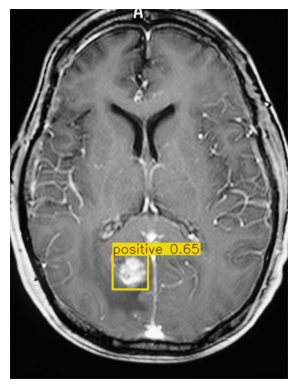

In [ ]:
import matplotlib.pyplot as plt

# Convertir la imagen con los resultados a numpy y mostrar
plt.imshow(results[0].plot())  # .plot() dibuja las cajas en la imagen
plt.axis('off')
plt.show()